In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
mooc = pd.read_csv("/Users/jasondeng/Desktop/aca2_dataset_training.csv")
mooc

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


In [12]:
# select related variables
mooc2 = mooc [['GRADE', 'Gender', 'Activity', 'ONTASK', 'Total Time', 'totalobs-forsession', 'NumACTIVITIES', 'TRANSITIONS', 'NumFORMATS', 'FORMATchanges', 'Obsv/act', 'Transitions/Durations']]
mooc2

,GRADE,Gender,Activity,ONTASK,Total Time,totalobs-forsession,NumACTIVITIES,TRANSITIONS,NumFORMATS,FORMATchanges,Obsv/act,Transitions/Durations
0,2,1,Wholecarpet,Y,1027,224,2,1,2,1,1390.500000,0.000664
1,3,1,Individual,Y,213,225,3,2,3,2,890.333333,0.002545
2,0,0,Smallgroup,Y,2078,374,4,3,2,1,770.500000,0.001439
3,1,0,Wholedesks,Y,3229,320,6,5,1,0,592.333333,0.001407
4,2,1,Wholedesks,Y,260,35,3,2,2,1,870.000000,0.005882
...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,1,Wholecarpet,Y,652,95,3,2,3,2,969.000000,0.002959
22180,0,0,Smallgroup,N,708,211,4,3,2,1,770.500000,0.001439
22181,4,0,Smallgroup,N,362,95,2,1,1,0,1060.000000,0.000472
22182,0,1,Wholedesks,Y,60,147,2,1,2,1,1204.500000,0.000838


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# transform the variable 'ONTASK' into dummy code
dummy = pd.get_dummies(mooc2['ONTASK'], prefix = 'ONTASK')
dummy

,ONTASK_N,ONTASK_Y
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
22179,0,1
22180,1,0
22181,1,0
22182,0,1


In [15]:
moocD = pd.concat([mooc2, dummy], axis=1)
moocD = moocD.drop(['ONTASK', 'ONTASK_N'], axis=1)
moocD

,GRADE,Gender,Activity,Total Time,totalobs-forsession,NumACTIVITIES,TRANSITIONS,NumFORMATS,FORMATchanges,Obsv/act,Transitions/Durations,ONTASK_Y
0,2,1,Wholecarpet,1027,224,2,1,2,1,1390.500000,0.000664,1
1,3,1,Individual,213,225,3,2,3,2,890.333333,0.002545,1
2,0,0,Smallgroup,2078,374,4,3,2,1,770.500000,0.001439,1
3,1,0,Wholedesks,3229,320,6,5,1,0,592.333333,0.001407,1
4,2,1,Wholedesks,260,35,3,2,2,1,870.000000,0.005882,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,1,Wholecarpet,652,95,3,2,3,2,969.000000,0.002959,1
22180,0,0,Smallgroup,708,211,4,3,2,1,770.500000,0.001439,0
22181,4,0,Smallgroup,362,95,2,1,1,0,1060.000000,0.000472,0
22182,0,1,Wholedesks,60,147,2,1,2,1,1204.500000,0.000838,1


In [16]:
Xs = moocD[["GRADE","Total Time",  "NumACTIVITIES", "TRANSITIONS","NumFORMATS","FORMATchanges", "Obsv/act", "Transitions/Durations" ]].to_numpy()
ONTASK = moocD.loc[:,"ONTASK_Y"].values.reshape(-1, 1)

In [17]:
moocDLogitModel1 = LogisticRegression()
moocDLogitModel1.fit(Xs, ONTASK)

/Users/jasondeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [18]:
validation= pd.read_csv('/Users/jasondeng/Desktop/aca2_dataset_validation.csv')
validation

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,20774,A,T8VQ,4,Z,15210,0,1,1,Wholecarpet,Y,1,2,1,2,1677.00,0.000446,0
1,30961,B,T9S,1,Z,165165,0,1,1,Wholedesks,Y,3,4,3,4,826.00,0.003672,0
2,35767,A,T8R,4,Z,188548,1,1,1,Wholecarpet,Y,3,4,2,3,862.75,0.004658,0
3,19990,A,T8T,2,Z,224646,0,1,1,Wholecarpet,N,2,3,0,1,1073.00,0.000621,0
4,18668,A,T8S,1,Z,402837,0,1,1,Individual,Y,3,4,2,3,1106.75,0.002841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,21660,A,T8R,4,Z,857436,0,31,487,Testing,Y,0,1,0,1,2530.00,0.000000,2367
5543,21662,A,T8R,4,Z,402069,1,31,489,Testing,Y,0,1,0,1,2530.00,0.000000,2375
5544,21665,A,T8R,4,Z,94671,1,31,492,Testing,N,0,1,0,1,2530.00,0.000000,2389
5545,21682,A,T8R,4,Z,762145,1,32,509,Testing,Y,0,1,0,1,2530.00,0.000000,2522


In [19]:
validation2 = validation [['GRADE', 'Gender', 'Activity', 'ONTASK', 'Total Time', 'totalobs-forsession', 'NumACTIVITIES', 'TRANSITIONS', 'NumFORMATS', 'FORMATchanges', 'Obsv/act', 'Transitions/Durations']]
validation2

,GRADE,Gender,Activity,ONTASK,Total Time,totalobs-forsession,NumACTIVITIES,TRANSITIONS,NumFORMATS,FORMATchanges,Obsv/act,Transitions/Durations
0,4,0,Wholecarpet,Y,0,1,2,1,2,1,1677.00,0.000446
1,1,0,Wholedesks,Y,0,1,4,3,4,3,826.00,0.003672
2,4,1,Wholecarpet,Y,0,1,4,3,3,2,862.75,0.004658
3,2,0,Wholecarpet,N,0,1,3,2,1,0,1073.00,0.000621
4,1,0,Individual,Y,0,1,4,3,3,2,1106.75,0.002841
...,...,...,...,...,...,...,...,...,...,...,...,...
5542,4,0,Testing,Y,2367,487,1,0,1,0,2530.00,0.000000
5543,4,1,Testing,Y,2375,489,1,0,1,0,2530.00,0.000000
5544,4,1,Testing,N,2389,492,1,0,1,0,2530.00,0.000000
5545,4,1,Testing,Y,2522,509,1,0,1,0,2530.00,0.000000


In [20]:
dummy2 = pd.get_dummies(validation2['ONTASK'], prefix = 'ONTASK')
dummy2

,ONTASK_N,ONTASK_Y
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
5542,0,1
5543,0,1
5544,1,0
5545,0,1


In [21]:
validation2 = pd.concat([validation2, dummy2], axis=1)
validation2 = validation2.drop(['ONTASK', 'ONTASK_N'], axis=1)
validation2

,GRADE,Gender,Activity,Total Time,totalobs-forsession,NumACTIVITIES,TRANSITIONS,NumFORMATS,FORMATchanges,Obsv/act,Transitions/Durations,ONTASK_Y
0,4,0,Wholecarpet,0,1,2,1,2,1,1677.00,0.000446,1
1,1,0,Wholedesks,0,1,4,3,4,3,826.00,0.003672,1
2,4,1,Wholecarpet,0,1,4,3,3,2,862.75,0.004658,1
3,2,0,Wholecarpet,0,1,3,2,1,0,1073.00,0.000621,0
4,1,0,Individual,0,1,4,3,3,2,1106.75,0.002841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5542,4,0,Testing,2367,487,1,0,1,0,2530.00,0.000000,1
5543,4,1,Testing,2375,489,1,0,1,0,2530.00,0.000000,1
5544,4,1,Testing,2389,492,1,0,1,0,2530.00,0.000000,0
5545,4,1,Testing,2522,509,1,0,1,0,2530.00,0.000000,1


In [22]:
Xs_logit = validation2[["GRADE","NumACTIVITIES", "Total Time", "TRANSITIONS","NumFORMATS","FORMATchanges","Obsv/act", "Transitions/Durations"]].to_numpy()
ONTASK_logit = validation2.loc[:,"ONTASK_Y"].values.reshape(-1, 1)

In [27]:
ONTASK_pred_logit1 = moocDLogitModel1.predict(Xs_logit)

# confusion matrix 

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
print(confusion_matrix(ONTASK_logit, ONTASK_pred_logit1))

[[   0 1849]
 [   0 3698]]


#TP=0 FN=1849 FP=0 TN=3698 
#precision & recall =0, accuracy=0.666, F1 score=0, P_agree=0.666, P_chance=0.666,k=0
#because the TP & FP =0,precision and recall are both equal to 0, this model dose not suitable for data 

# K-means 

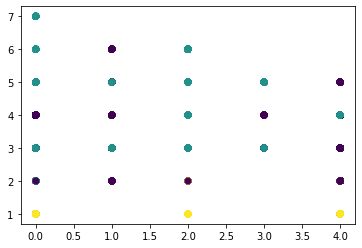

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(Xs_logit)
cluster_kmeans = kmeans.predict(Xs_logit)

plt.scatter(Xs_logit[:, 0], Xs_logit[:, 1], c=cluster_kmeans, cmap='viridis') 

# Scree plot for PCA

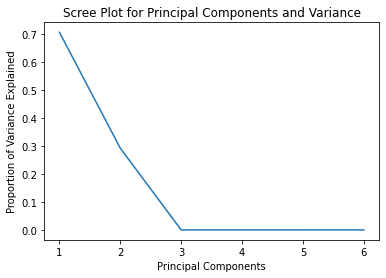

In [52]:
pca = PCA(n_components='mle')
reduced = pca.fit(Xs_logit)
variance_ratio = reduced.explained_variance_ratio_
plt.plot(range(1,7), variance_ratio[0:6])
plt.title("Scree Plot for Principal Components and Variance")
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Variance Explained")
plt.show()